In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [12]:
# Kinsale Capital Group
knsl = pdr.get_data_yahoo('KNSL','2019-05-31')
knsl.drop('Adj Close', axis=1, inplace=True)
knsl.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-30,84.495003,82.940002,83.040001,83.900002,88200.0
2019-05-31,84.690002,81.449997,83.120003,83.790001,120500.0
2019-06-03,87.220001,83.699997,84.070000,87.120003,109500.0
2019-06-04,87.870003,85.739998,87.330002,86.320000,117200.0
2019-06-05,88.980003,85.940002,86.489998,86.379997,62900.0


In [22]:
knsl['3-day'] = knsl['Close'].rolling(3).mean()
knsl['9-day'] = knsl['Close'].rolling(9).mean()
knsl['21-day'] = knsl['Close'].rolling(21).mean()
knsl['Change'] = np.log(knsl.Close / knsl.Close.shift())
knsl.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change,position,system,3-day
Date,,,,,,,,,,,
2021-05-26,166.304993,162.339996,163.449997,164.479996,80200.0,161.782221,164.273333,0.005793,-1,-0.005793,163.973333
2021-05-27,166.259995,163.850006,164.350006,165.570007,106800.0,162.231111,164.015714,0.006605,-1,-0.006605,164.526667
2021-05-28,166.770004,165.190002,165.470001,166.460007,65200.0,163.038890,163.712381,0.005361,-1,-0.005361,165.503337
2021-06-01,167.000000,162.009995,167.000000,162.080002,75500.0,163.503335,163.144286,-0.026665,1,-0.026665,164.703339
2021-06-02,162.535004,160.000000,162.279999,162.199997,129367.0,163.817780,162.711905,0.000740,1,0.000740,163.580002


In [14]:
knsl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2019-05-30 to 2021-06-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    507 non-null    float64
 1   Low     507 non-null    float64
 2   Open    507 non-null    float64
 3   Close   507 non-null    float64
 4   Volume  507 non-null    float64
 5   9-day   499 non-null    float64
 6   21-day  487 non-null    float64
 7   Change  506 non-null    float64
dtypes: float64(8)
memory usage: 35.6 KB


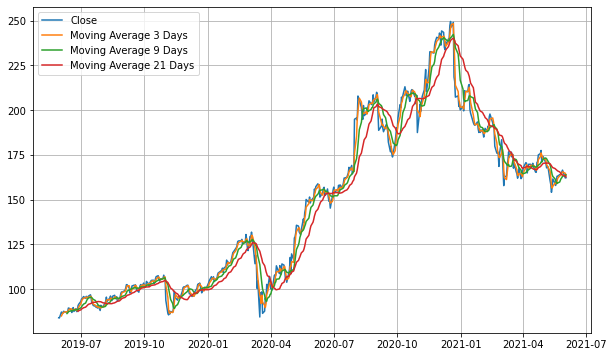

In [23]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'],label='Close')
plt.plot(knsl['3-day'],label='Moving Average 3 Days')
plt.plot(knsl['9-day'],label='Moving Average 9 Days')
plt.plot(knsl['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

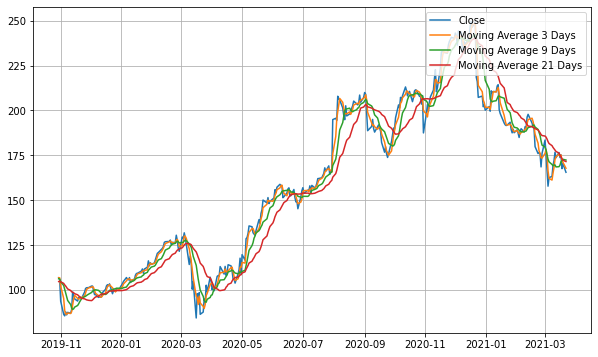

In [24]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-400:-50],label='Close')
plt.plot(knsl['3-day'][-400:-50],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-400:-50],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-400:-50],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

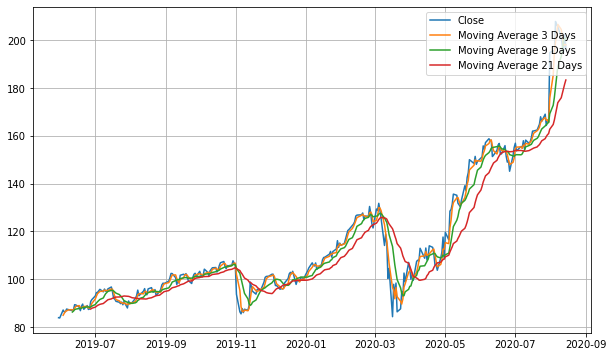

In [25]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][:-200],label='Close')
plt.plot(knsl['3-day'][:-200],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

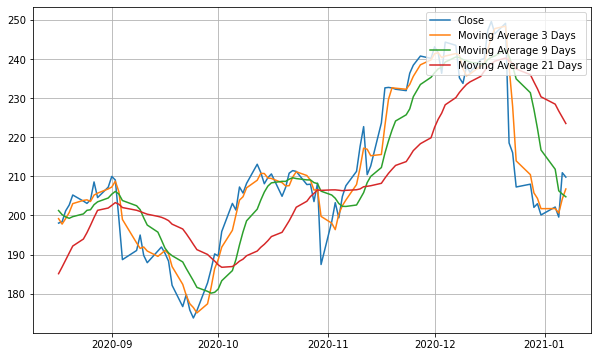

In [35]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

In [26]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position'] = np.where(knsl['9-day'] > knsl['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position'] = np.where(knsl['9-day'] < knsl['21-day'],-1,knsl['position'])

<AxesSubplot:xlabel='Date'>

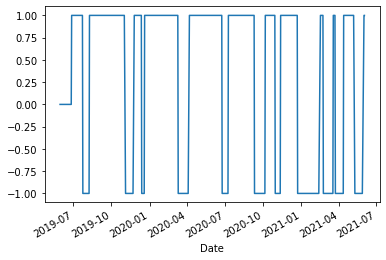

In [27]:
knsl['position'].plot()

<AxesSubplot:xlabel='Date'>

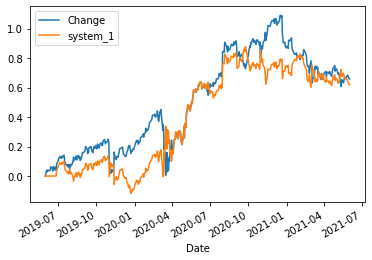

In [38]:
# Whether we are making money with this system
knsl['system_1'] = knsl['position'] * knsl['Change']
knsl[['Change','system_1']].cumsum().plot()

In [31]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position2'] = np.where(knsl['3-day'] > knsl['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position2'] = np.where(knsl['3-day'] < knsl['9-day'],-1,knsl['position'])

<AxesSubplot:xlabel='Date'>

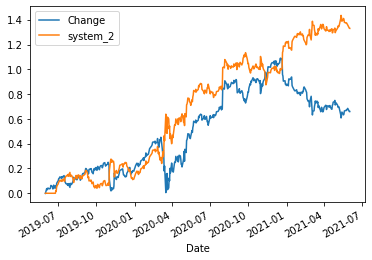

In [39]:
# Whether we are making money with this system
knsl['system_2'] = knsl['position2'] * knsl['Change']
knsl[['Change','system_2']].cumsum().plot()